In [20]:
# kutuphaneleri indiriyoruz
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [21]:
# indirilen gerekli kutuphaneleri yukluyoruz

import numpy as np # matematiksel matrisler icin kullanilir
import pandas as pd # veri isleme asamalarinda kullanilir
%matplotlib inline
import matplotlib as mpl # veri gorsellestirmede kullanilir
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns # detayli veri gorsellestirme islemlerinde kullanilir
import datetime
import random
import os

In [22]:
# ardindan verimizi okuyoruz
df = pd.read_csv("dataTR.csv")
df # bu komutu goruntulemek icin kullaniyoruz

,Yas,Cinsiyet,Kurum,Ev_icerisindeki_gün_sayisi,Stres_buyuyor_mu,Karantinaolumsuzluklari,Aliskanliklarda_degisim,Zihinsel_saglik_gecmisi,Kilo_degiskligi,Ruh_hali_degisiklikleri,Mucadelelerde_basa_cikma,ise_karsi_olan_ilgi,Sosyal_zayiflik
0,20-25,Dişi,Kurumsal,1-14 gün,Evet,Evet,HAYIR,Evet,Evet,Orta,HAYIR,HAYIR,Evet
1,30-,Erkek,Diğerleri,31-60 gün,Evet,Evet,Belki,HAYIR,HAYIR,Yüksek,HAYIR,HAYIR,Evet
2,30-,Dişi,Öğrenci,Her gün dışarı çık,HAYIR,HAYIR,Evet,HAYIR,HAYIR,Orta,Evet,Belki,HAYIR
3,25-30,Erkek,Diğerleri,1-14 gün,Evet,HAYIR,Belki,HAYIR,Belki,Orta,HAYIR,Belki,Evet
4,16-20,Dişi,Öğrenci,2 aydan fazla,Evet,Evet,Evet,HAYIR,Evet,Orta,Evet,Belki,HAYIR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,20-25,Erkek,Kurumsal,Her gün dışarı çık,HAYIR,Evet,HAYIR,Evet,Evet,Orta,HAYIR,Evet,Belki
820,20-25,Erkek,Diğerleri,1-14 gün,Evet,Evet,HAYIR,Evet,Belki,Düşük,HAYIR,Belki,Belki
821,20-25,Erkek,Öğrenci,2 aydan fazla,Evet,Belki,Belki,HAYIR,Evet,Yüksek,Evet,Evet,Belki
822,16-20,Erkek,İşletme,15-30 gün,HAYIR,HAYIR,Belki,HAYIR,Belki,Düşük,Evet,HAYIR,Belki


In [23]:
# veri setimizin bazi ozelliklerine bakiyoruz
df.shape

(824, 13)

In [24]:
df.dtypes

Yas                           object
Cinsiyet                      object
Kurum                         object
Ev_icerisindeki_gün_sayisi    object
Stres_buyuyor_mu              object
Karantinaolumsuzluklari       object
Aliskanliklarda_degisim       object
Zihinsel_saglik_gecmisi       object
Kilo_degiskligi               object
Ruh_hali_degisiklikleri       object
Mucadelelerde_basa_cikma      object
ise_karsi_olan_ilgi           object
Sosyal_zayiflik               object
dtype: object

In [25]:
# anket veri setimizde yer alan birbirinden farklı cevap sayilarini goruntuluyoruz
df.nunique()

Yas                           4
Cinsiyet                      2
Kurum                         5
Ev_icerisindeki_gün_sayisi    5
Stres_buyuyor_mu              3
Karantinaolumsuzluklari       3
Aliskanliklarda_degisim       3
Zihinsel_saglik_gecmisi       3
Kilo_degiskligi               3
Ruh_hali_degisiklikleri       3
Mucadelelerde_basa_cikma      2
ise_karsi_olan_ilgi           3
Sosyal_zayiflik               3
dtype: int64

In [26]:
# null yani sıfır olan degerlere her bir sutun icin bakiyoruz
df.isnull().sum()

Yas                           0
Cinsiyet                      0
Kurum                         0
Ev_icerisindeki_gün_sayisi    0
Stres_buyuyor_mu              0
Karantinaolumsuzluklari       0
Aliskanliklarda_degisim       0
Zihinsel_saglik_gecmisi       0
Kilo_degiskligi               0
Ruh_hali_degisiklikleri       0
Mucadelelerde_basa_cikma      0
ise_karsi_olan_ilgi           0
Sosyal_zayiflik               0
dtype: int64

VERİ GÖRSELLEŞTİRME KISMI


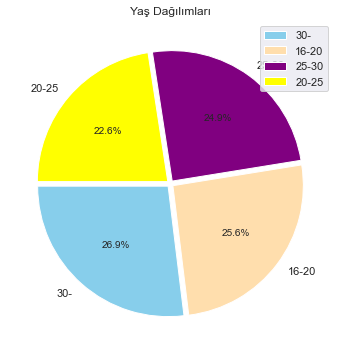

In [27]:
# oncelikle yas dagilimlarini gorsellestirelim

plt.figure(figsize=(12,6))
baslik = "Yaş Dağılımları"
plt.title(baslik)
g = plt.pie(df.Yas.value_counts(), explode=(0.025,0.025,0.025,0.025), labels=df.Yas.value_counts().index, colors=['skyblue','navajowhite', "purple","yellow"],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.savefig(f"ciktilar\\{baslik}.jpg", dpi=300)
plt.show()



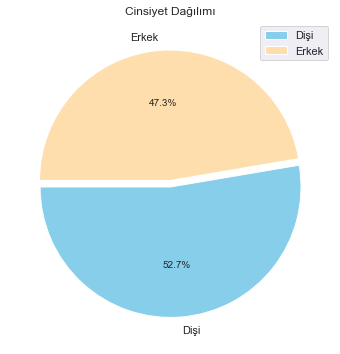

In [28]:
# ardindan cinsiyet dagilimlarini yapalim

plt.figure(figsize=(12,6))
baslik = "Cinsiyet Dağılımı"
plt.title(baslik)
g = plt.pie(df.Cinsiyet.value_counts(), explode=(0.025,0.025), labels=df.Cinsiyet.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.savefig(f"ciktilar\\{baslik}.jpg", dpi=300)
plt.show()



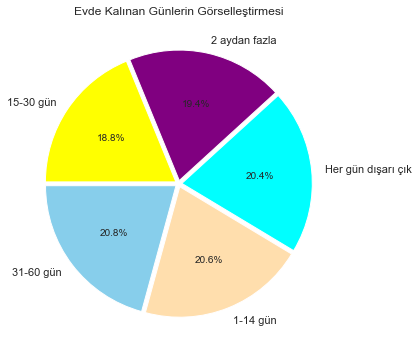

In [29]:
# simdi ise ev icerisinde kalinan gunleri gorsellestirelim
df.Ev_icerisindeki_gün_sayisi.value_counts() # buradan kac farkli evde kalma sinifi oldugunu ogreniyoruz

plt.figure(figsize=(12,6))
baslik = "Evde Kalınan Günlerin Görselleştirmesi"
plt.title(baslik)
g = plt.pie(df.Ev_icerisindeki_gün_sayisi.value_counts(), explode=(0.025,0.025,0.025,0.025,0.025), labels=df.Ev_icerisindeki_gün_sayisi.value_counts().index, colors=['skyblue','navajowhite', "cyan","purple","yellow"],autopct='%1.1f%%', startangle=180);
plt.savefig(f"ciktilar\\{baslik}.jpg", dpi=300)
plt.show()

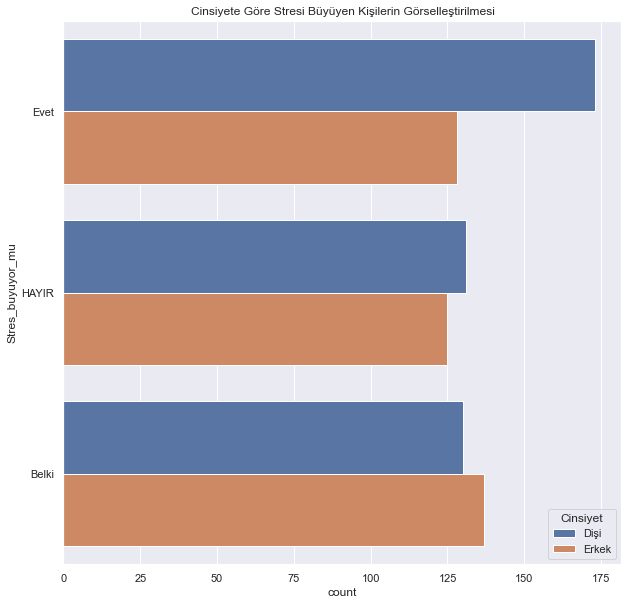

In [30]:
# ardindan stres buyumesini cinsiyete gore inceliyoruz
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Stres_buyuyor_mu", hue="Cinsiyet", data=df)
baslik = "Cinsiyete Göre Stresi Büyüyen Kişilerin Görselleştirilmesi"
plt.title(baslik)
plt.savefig(f"ciktilar\\{baslik}.jpg", dpi=300)
plt.show()

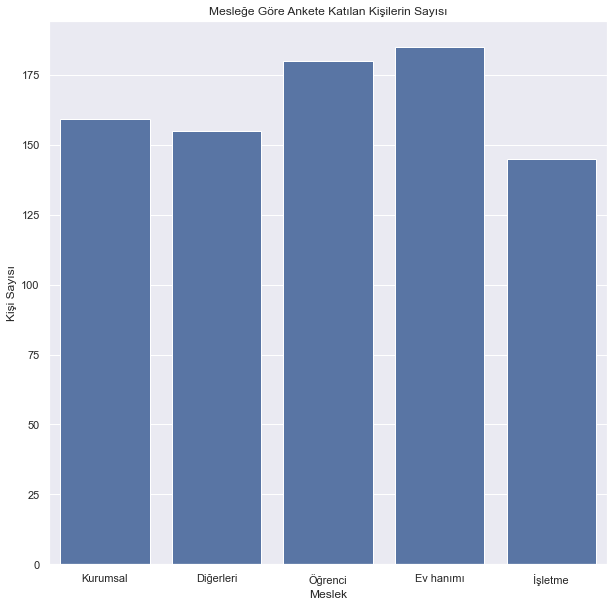

In [31]:
c

MODEL EĞİTME KISMI


In [32]:
# oncelikle gerekli kutuphaneleri iceri aktariyoruz
%pip install imblearn
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score
from imblearn.over_sampling import SMOTE

Note: you may need to restart the kernel to use updated packages.


In [33]:
# dogruluk paylarinin yuksek olmasi icin veri setlerini cinsiyete gore ikiye ayiriyoruz
print(df)
erkek_df = df[df["Cinsiyet"] == "Erkek"]
disi_df = df[df["Cinsiyet"] == "Dişi"]

print(erkek_df)


       Yas Cinsiyet      Kurum Ev_icerisindeki_gün_sayisi Stres_buyuyor_mu  \
0    20-25     Dişi   Kurumsal                   1-14 gün             Evet   
1      30-    Erkek  Diğerleri                  31-60 gün             Evet   
2      30-     Dişi    Öğrenci         Her gün dışarı çık            HAYIR   
3    25-30    Erkek  Diğerleri                   1-14 gün             Evet   
4    16-20     Dişi    Öğrenci              2 aydan fazla             Evet   
..     ...      ...        ...                        ...              ...   
819  20-25    Erkek   Kurumsal         Her gün dışarı çık            HAYIR   
820  20-25    Erkek  Diğerleri                   1-14 gün             Evet   
821  20-25    Erkek    Öğrenci              2 aydan fazla             Evet   
822  16-20    Erkek    İşletme                  15-30 gün            HAYIR   
823    30-     Dişi  Diğerleri                  15-30 gün            HAYIR   

    Karantinaolumsuzluklari Aliskanliklarda_degisim Zihinsel_sa

In [40]:
# ardindan veri setimizde yer alan object sınıfına ait sütunlari nümerik degerlere ceviriyoruz
def toNum(dataframe):
    label_encoders = {}
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            le = LabelEncoder()
            dataframe[column] = le.fit_transform(dataframe[column])
            label_encoders[column] = le
            
toNum(disi_df)
toNum(erkek_df)

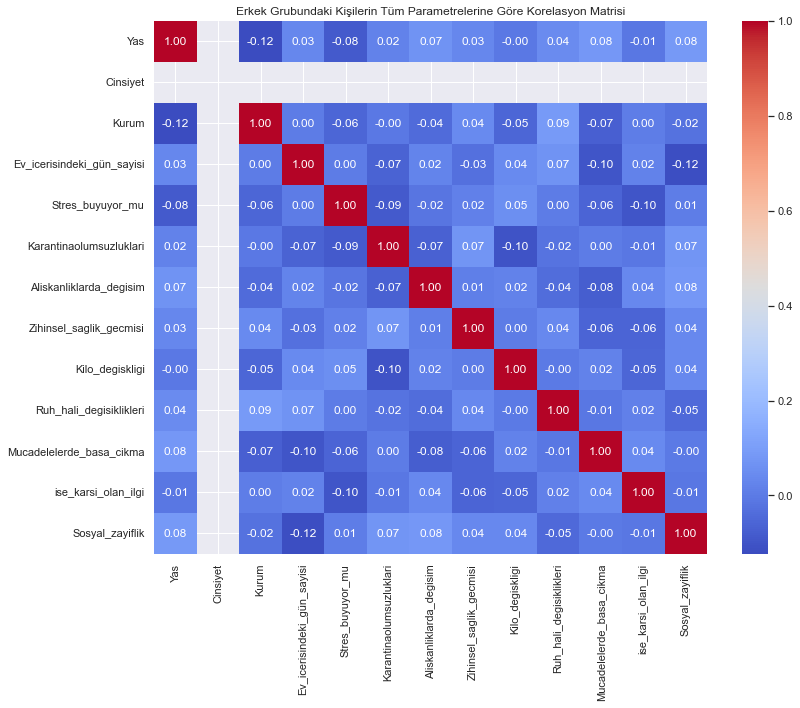

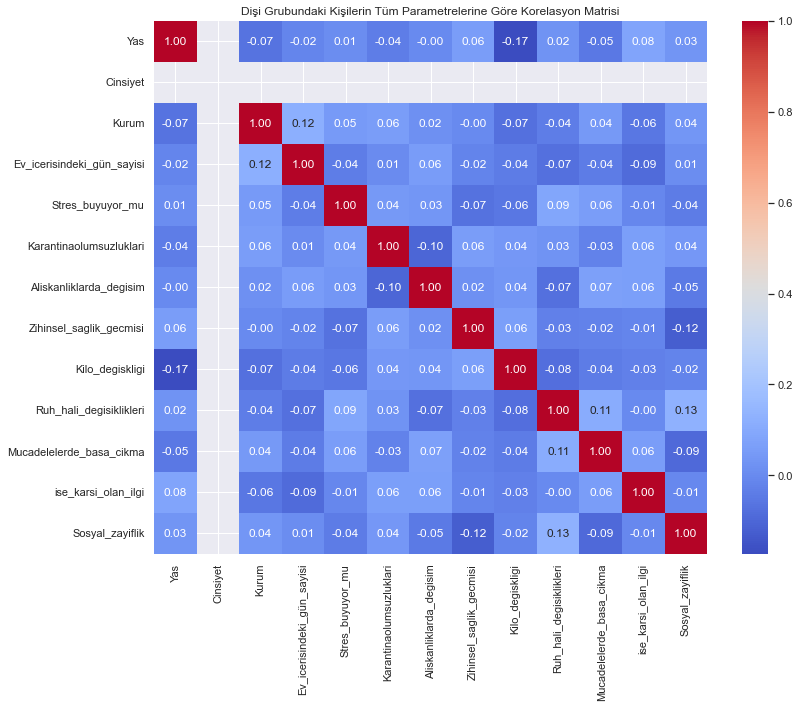

In [39]:
# veri setimizi numeric degerlere cevirdikten sonra bir korelasyon grafigi olusturalim

def calculateCorr(dataframe, label):
    
    # Korelasyon heatmap'i çizme
    plt.figure(figsize=(12, 10))
    cinsiyet = dataframe["Cinsiyet"].iloc[0]
    baslik = f"{label} Grubundaki Kişilerin Tüm Parametrelerine Göre Korelasyon Matrisi"
    korelasyon_matrisi = dataframe.corr()
    sns.heatmap(korelasyon_matrisi, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(baslik)
    plt.tight_layout()
    plt.savefig(f"ciktilar\\{baslik}_{cinsiyet}.jpg", dpi=300)
    plt.show()

calculateCorr(erkek_df,"Erkek")
calculateCorr(disi_df, "Dişi")

In [ ]:
# verisetlerimizi feature ve target olarak iki kisma ayiriyoruz
X_erkek = erkek_df.drop("Sosyal_zayiflik", axis=1)
y_erkek = erkek_df["Sosyal_zayiflik"]

X_disi = disi_df.drop("Sosyal_zayiflik", axis=1)
y_disi = disi_df["Sosyal_zayiflik"]

In [ ]:
# egitim ve test verilerini ayarliyoruz
X_train_erkek, X_test_erkek, y_train_erkek, y_test_erkek = train_test_split(X_erkek, y_erkek, test_size=0.3, random_state=42) # yuzde 30 test kullandik

X_train_disi, X_test_disi, y_train_disi, y_test_disi = train_test_split(X_disi, y_disi, test_size=0.3, random_state=42) # yuzde 30 test kullandik


In [ ]:
# ozellikler kismini olceklendiriyoruz
scaler = StandardScaler()
X_train_erkek = scaler.fit_transform(X_train_erkek)
X_test_erkek = scaler.transform(X_test_erkek)


X_train_disi = scaler.fit_transform(X_train_disi)
X_test_disi = scaler.transform(X_test_disi)

In [ ]:
# sinif dengesizligini engellemek amaci ile smote teknigini kullaniyoruz
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_erkek, y_train_erkek)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_disi, y_train_disi)




In [ ]:
# modelleri tanimliyoruz
models = {
    "Lojistik Regresyon": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Destek Vektör Makineleri": SVC(),
    "K-En Yakın Komşu": KNeighborsClassifier(),
    "Gradient Boosting Karar Ağacı": GradientBoostingClassifier()
}



In [ ]:
# modelleri eğitip sonuclari hesaplayan fonksiyonu yaziyoruz
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    return accuracy, precision

# fonksiyonu kullanarak 5 modeli de egitip ciktilarini aliyoruz
results_erkek = []
results_disi = []

for name, model in models.items():
    accuracy, precision = train_and_evaluate(model, X_train_resampled, y_train_resampled, X_test_erkek, y_test_erkek)
    results_erkek.append((name, accuracy, precision))

for name, model in models.items():
    accuracy, precision = train_and_evaluate(model, X_train_resampled, y_train_resampled, X_test_disi, y_test_disi)
    results_disi.append((name, accuracy, precision))

    

# sonuclari dataframe olarak kaydedip goruntuluyoruz
results_df_erkek = pd.DataFrame(results_erkek, columns=["Model", "Doğruluk", "Tahmin"])
results_df_disi = pd.DataFrame(results_disi, columns=["Model", "Doğruluk", "Tahmin"])

print("ERKEK SINIFI İÇİN MODEL SONUÇLARI")
print(results_df_erkek)
print("\n\nDİŞİ SINIFI İÇİN MODEL SONUÇLARI")
print(results_df_disi)

ERKEK SINIFI İÇİN MODEL SONUÇLARI
                           Model  Doğruluk    Tahmin
0             Lojistik Regresyon  0.341880  0.343286
1                  Random Forest  0.427350  0.439355
2       Destek Vektör Makineleri  0.367521  0.369213
3               K-En Yakın Komşu  0.444444  0.440492
4  Gradient Boosting Karar Ağacı  0.384615  0.416638


DİŞİ SINIFI İÇİN MODEL SONUÇLARI
                           Model  Doğruluk    Tahmin
0             Lojistik Regresyon  0.351145  0.370657
1                  Random Forest  0.335878  0.349392
2       Destek Vektör Makineleri  0.374046  0.381278
3               K-En Yakın Komşu  0.320611  0.366482
4  Gradient Boosting Karar Ağacı  0.343511  0.342476
